# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers

## 1. Problem definition

> How well can we predict the future sale price of a bulldozer, given it's chacteristics and previous examples of how much similar Bulldozers has been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebool for Bulldozers: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this proyect check the link.

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model wich minimises RMSLE

## 4. Features

SalesID:	  unique identifier of a particular sale of a machine at auction

MachineID:	  identifier for a particular machine;  machines may have multiple sales

ModelID:	  identifier for a unique machine model (i.e. fiModelDesc)

datasource:	  source of the sale record;  some sources are more diligent about reporting attributes of the machine than others.  Note that a particular datasource may report on multiple auctioneerIDs.

auctioneerID:	  identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as datasource.

YearMade:	  year of manufacturer of the Machine

MachineHoursCurrentMeter:	  current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale

UsageBand:	  value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.

Saledate:	  time of sale

Saleprice:	  cost of sale in USD

fiModelDesc:	  Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & 
fiModelDescriptor

fiBaseModel:	  disaggregation of fiModelDesc

fiSecondaryDesc:	  disaggregation of fiModelDesc

fiModelSeries:	  disaggregation of fiModelDesc

fiModelDescriptor:	  disaggregation of fiModelDesc

ProductSize:	  Don't know what this is 

ProductClassDesc:	  description of 2nd level hierarchical grouping (below 
ProductGroup) of fiModelDesc

State:	  US State in which sale occurred

ProductGroup:	  identifier for top-level hierarchical grouping of fiModelDesc

ProductGroupDesc:	  description of top-level hierarchical grouping of fiModelDesc

Drive_System:	machine configuration;  typcially describes whether 2 or 4 wheel drive

Enclosure:	machine configuration - does machine have an enclosed cab or not

Forks:	machine configuration - attachment used for lifting
Pad_Type:	machine configuration - type of treads a crawler machine uses

Ride_Control:	machine configuration - optional feature on loaders to make the ride smoother

Stick:	machine configuration - type of control 

Transmission:	machine configuration - describes type of transmission;  typically automatic or manual

Turbocharged:	machine configuration - engine naturally aspirated or turbocharged

Blade_Extension:	machine configuration - extension of standard blade

Blade_Width:	machine configuration - width of blade

Enclosure_Type:	machine configuration - does machine have an enclosed cab or not

Engine_Horsepower:	machine configuration - engine horsepower rating

Hydraulics:	machine configuration - type of hydraulics

Pushblock:	machine configuration - option

Ripper:	machine configuration - implement attached to machine to till soil

Scarifier:	machine configuration - implement attached to machine to condition soil

Tip_control:	machine configuration - type of blade control

Tire_Size:	machine configuration - size of primary tires

Coupler:	machine configuration - type of implement interface

Coupler_System:	machine configuration - type of implement interface

Grouser_Tracks:	machine configuration - describes ground contact interface

Hydraulics_Flow	:machine configuration - normal or high flow hydraulic system

Track_Typ:e	machine configuration - type of treads a crawler machine uses

Undercarriage_Pad_Width:	machine configuration - width of crawler treads

Stick_Length:	machine configuration - length of machine digging implement

Thumb:	machine configuration - attachment used for grabbing

Pattern_Changer:	machine configuration - can adjust the operator control configuration to suit the user

Grouser_Type:	machine configuration - type of treads a crawler machine uses

Backhoe_Mounting:	machine configuration - optional interface used to add a backhoe attachment

Blade_Type:	machine configuration - describes type of blade

Travel_Controls:	machine configuration - describes operator control configuration

Differential_Type:	machine configuration - differential type, typically locking or standard

Steering_Controls:	machine configuration - describes operator control configuration

video = Exploring Our Data

In [41]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear  inside the notebook
%matplotlib inline

# Model from Scikit-learn Classification

#from sklearn.linear import LogisticRegression()
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier

# Model from Scikit-learn Regression
from sklearn.ensemble import RandomForestRegressor

# # Model Evaluations classification
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import RocCurveDisplay

# Model Evaluations Regression
from sklearn.metrics import mean_squared_log_error # 10% off
from sklearn.metrics import mean_absolute_error # 10 dolars off
from sklearn.metrics import r2_score

# Parameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [160]:
# import training and validation data
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory = False) # because the data is too large pandas
# try to minimize the space it's taken
# you will get a warning otherwise
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [162]:
# check for null values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

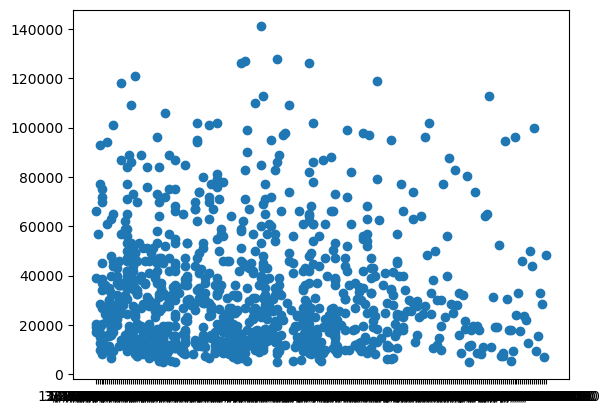

In [163]:
# try to visualize some data
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

plt.show()

In [164]:
# see the time data
df.saledate
# we might to change that

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

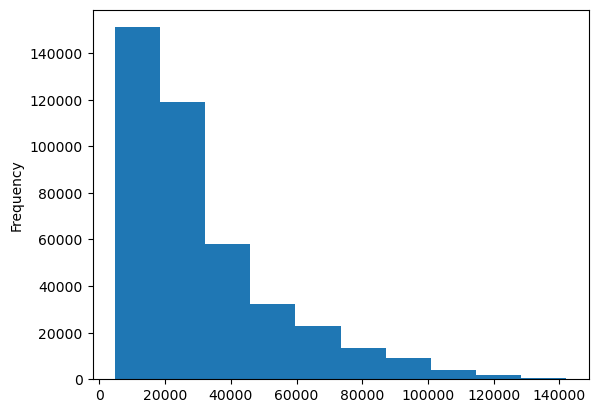

In [165]:
df.SalePrice.plot.hist()
plt.show()

### Parsing dates

When we work wiht time series data, we want to enrich the time & data component as much as possible.

We can do that by telling pandas wich of our columns has dates in it using the 'parse_dates' parameter.

Parse_dates its going to turn wich ever column we pass as parse_dates, into a date time object

What is a date time object in pandas?

In [166]:
# Import data again but this time parse dates
df = pd.read_csv('data/TrainAndValid.csv',
                low_memory = False,
                parse_dates = ['saledate'])

In [167]:
df.saledate.dtype

dtype('<M8[ns]')

In [168]:
df.saledate[:1000]
# YY-MM-dd
# dtype: datetime64, same as <M8[ns]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

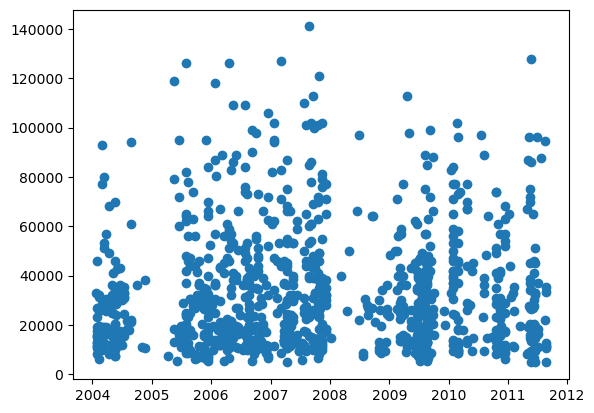

In [169]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])
plt.show()
# this one looks much better

In [170]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
df.head().T
# there is a bunch of missing values

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


video = Exploring Our Data 2

### Sort DataFrame by saledate

When working with TimSeries data it is a good idea to sort it by date.

In [172]:
# Sort DataFrame in Date order
df.sort_values(by = ['saledate'], inplace = True, ascending = True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [173]:
df.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Make a copy of the original DF

we make a copy of the original DF so when we manipulate the copy we still got our original data

In [174]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

video = Feature Engineering

this means create a new feature or edit the acttal features

### Add datetime parameters for saledate column

We can enrich our datetime object

In [175]:
# acces the year and day from a date
df_tmp[:1].saledate.dt.year, df_tmp[:1].saledate.dt.day

(205615    1989
 Name: saledate, dtype: int32,
 205615    17
 Name: saledate, dtype: int32)

In [176]:
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp['saledate'].dt.dayofyear

In [177]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [178]:
# we dont need the sale date anymore
# we have enriched our DataFrame with date time features
df_tmp = df_tmp.drop('saledate', axis = 1)
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [179]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [180]:
# Remeber we are doing exploratory data analysis EDA
# check the calues of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling

We've don enough EDA (we could always do more) but let's start to do some model -driven EDA.

Let's build a machine learning model.

Remember that we are trying to use all the independent variable to preidct
the variable SalePrice.

what kind of machine laerning should we use. Go to the scikit-learn map

In [181]:
# lets build a machine learning model

model = RandomForestRegressor(random_state = 42) # random_state is like random.seed

model.fit(df_tmp.drop('SalePrice', axis = 1), df_tmp['SalePrice'])

ValueError: could not convert string to float: 'Low'

In [182]:
# we dont have all numeric values and we need to take care of NaN
df_tmp.info()
# this is model-driven EDA

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

video = Turning Data Into Numbers

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html

In [183]:
df_tmp.UsageBand[:100]

205615    NaN
274835    NaN
141296    NaN
212552    NaN
62755     NaN
         ... 
113454    NaN
62665     NaN
78445     NaN
233279    NaN
28223     NaN
Name: UsageBand, Length: 100, dtype: object

In [184]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

False

In [185]:
# find the columns wich contains string
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
# dont know why it is not showing us the others features

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [186]:
# if you're wondering what df.items() does, here's an example
random_dict = {'key1': 'hello',
              'key2': 'world'}

for key, value in random_dict.items():
    print(f'This is a key: {key}',
         f'This is a value: {value}')

This is a key: key1 This is a value: hello
This is a key: key2 This is a value: world


In [187]:
# this will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered() # this add a number to the category

In [188]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [189]:
# we cant pass strings to a machine learning model
# and now this is going to assing a numerical value to each category
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [190]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [191]:
# find the columns wich contains object
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [192]:
# this will turn all of the object values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered() # this add a number to the category

In [198]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

Thanks to pandas Categories we now have a way to access all of our data in the form os numbers.

But we still ahve a bunch of missing data

In [194]:
# check missing data. Ratio
df_tmp.isnull().sum()/len(df_tmp)
# we might want to fill this missing values

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save Preprocessed data

In [195]:
# Export current tmp dataframe
df_tmp.to_csv('data/train_temp.csv',
             index = False)

In [3]:
# import preprocessed data
df_tmp = pd.read_csv('data/train_temp.csv',
                    low_memory = False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [4]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill Missing values

### Fill numeric Missing values first

video = Filling Missing Numerical Values

In [5]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [7]:
# state does not have missing values
pd.isnull(df_tmp.state).sum()

np.int64(0)

In [8]:
# auctioneerID does
pd.isnull(df_tmp.auctioneerID).sum()

np.int64(20136)

In [9]:
# check for wich numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content): # content is the whole column
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [10]:
# fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content): 
        if pd.isnull(content).sum():
            # add a binary column wich tells us if the data was missing or not
            df_tmp[label+'_is_missing'] = pd.isnull(content) # we will know that that row was fill because it was empty
            #fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [11]:
# the median is more ruboust from the mean
# because mean is sentivie to outliers 
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(np.float64(100.0),
 np.float64(999100.8991008991),
 np.float64(100.0),
 np.float64(100.0))

In [12]:
# if there is any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [13]:
# check to see how many examples were missing
# now we can see the values we have filled
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [14]:
# we still have some missing values
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

video = Filling Missing Categorical Values

### Filling and turning categorical variables into number

In [15]:
# check for columns arent numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [16]:
# remember that we have a numerical value for the categories we created
pd.Categorical(df_tmp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], shape=(412698,), dtype=int8)

In [18]:
# turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add a binary columns to indicate whether sample has missing value
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1 # if there were some missing values it fills with -1, but now will fill w 0 

In [17]:
# that explain the line from above if we dont add the +1
pd.Categorical(df_tmp['UsageBand']).codes # it is an array full with -1

array([-1, -1, -1, ..., -1, -1, -1], shape=(412698,), dtype=int8)

In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [20]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [21]:
df_tmp.isna().sum()[:57]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

Now that all our data is numeric as well as our dataframe has no missing values we should be able to build a machine learning model

video = Fitting A Machine Learning Model

In [22]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [23]:
# how many rows do we have
len(df_tmp)

412698

In [24]:
# how much time this particular cell takes to run
%time # we have a bigger data
# so as a data scientist and machine learning engineer we want to do as many
# experiments as fast as possible
# you have to wonder how can you reduce the amount of time it takes between
# my experiments

# instantiate model
model = RandomForestRegressor()

# fit the model
model.fit(df_tmp.drop('SalePrice', axis = 1), df_tmp['SalePrice'])

CPU times: total: 0 ns
Wall time: 6.44 μs


RandomForestRegressor()

## Splitting data into train/validation sets

video = Splitting Data

In [25]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [26]:
# check out the samples per year
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [27]:
# Split data into training and validation
df_train = df_tmp[df_tmp.saleYear != 2012]
df_val = df_tmp[df_tmp.saleYear == 2012]

len(df_train), len(df_val)

(401125, 11573)

In [28]:
# Split data into X & y
X_train, y_train = df_train.drop('SalePrice', axis = 1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis = 1), df_val['SalePrice']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

we have done something wrong. We should have split our data then filling it. Because we were using the entire data to fill missing values, meaning, data from de train and validation sets, wich is wrong. We must have done it separetly

### Build an Evaluation Function

<img src = 'regression-metrics.png'>

video = Custom Evaluation Function

In [52]:
# create evaluation function (the competition uses RMSLE)
def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# create function to evaluate model on a feew different levels
# if our model is doing better on the val_preds than the train_preds
# means it is overfitting
# you slightly will see worst evaluation metrics
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
             'Valid MAE': mean_absolute_error(y_valid, val_preds),
             'Training RMSLE': rmsle(y_train, train_preds),
             'Valid RMSLE': rmsle(y_valid, val_preds),
             'Training R^2': r2_score(y_train, train_preds),
             'Valid R^2': r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

video = Reducing Data

In [30]:
# this takes far too long
#%time
#model = RandomForestRegressor(random_state = 42)

#model.fit(X_train, y_train)

In [31]:
# we have too many rows
len(X_train)

401125

In [32]:
# Change max_samples value on RandomForestRegressor
model = RandomForestRegressor(random_state = 42)

model

RandomForestRegressor(random_state=42)

In [33]:
X_train.shape[0] * 100 # times N_estimators
# the calculations is going to do
# we want to minimize that nomber

40112500

In [35]:
# Change max_samples value on RandomForestRegressor
model = RandomForestRegressor(random_state = 42,
                             max_samples = 10000)

model

RandomForestRegressor(max_samples=10000, random_state=42)

In [37]:
# now is going to be
X_train.shape[0] * 100 / (10000 * 100)
# 40 times less

40.1125

In [38]:
%%time
# cutting down on the max number of samples each estimator can see improves
# training time
model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 17.2 μs


RandomForestRegressor(max_samples=10000, random_state=42)

In [39]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': np.float64(0.257745378256977),
 'Valid RMSLE': np.float64(0.29362638671089003),
 'Training R^2': 0.8320374995090507}

we are not everfitting :).
We expect this metrics to be worse since we are not using all data

### Hyperparameter tuning with RandomizedSearchCV

Video = RandomizedSearchCV

In [48]:
# different randomForestRegressor Hyperparameters
# you can search on the internet how to tune hyperparameters for RFRegressor
rf_grid = {'n_estimators': np.arange(10, 100, 10),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2),
          'max_features': [0.5, 1, 'sqrt', 'auto'],
          'max_samples': [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(random_state = 42),
                             param_distributions = rf_grid,
                             n_iter = 20, # cominations of parameters froma above
                             cv = 5,
                             verbose = True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Projects\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Projects\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Projects\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Projects\sample_project_1\env\Lib\site-packages\sklearn\base.py", l

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [49]:
# Find the best hyperparamters that RandomizeSearchCV found for us
rs_model.best_params_

{'n_estimators': np.int64(40),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(13),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [53]:
# evaluate the RanomizedSearch
show_scores(rs_model)

{'Training MAE': 6616.771492075968,
 'Valid MAE': 7920.154420716864,
 'Training RMSLE': np.float64(0.2957634649949611),
 'Valid RMSLE': np.float64(0.318974536682744),
 'Training R^2': 0.8061853612982357,
 'Valid R^2': 0.7962834335268852}

it is actuallt worst than before because we did not use all the sample data :)

### Train a model with the best Hyperparameters

video = Improving Hyperparameters

In [54]:
rs_model.best_params_

{'n_estimators': np.int64(40),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(13),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [55]:
%%time

# most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators = 40,
                                   min_samples_split = 16,
                                   min_samples_leaf = 13,
                                   max_samples = None, # we want to train on all the data
                                   max_features = 0.5,
                                   max_depth = None,
                                   random_state = 42) # so our results are reproducible

# fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 2min 17s
Wall time: 2min 24s


RandomForestRegressor(max_features=0.5, min_samples_leaf=13,
                      min_samples_split=16, n_estimators=40)

In [57]:
# let's check out thw scores on this ones
# scores for ideal_model (trained in all data)
show_scores(ideal_model)

{'Training MAE': 4095.0350396508584,
 'Valid MAE': 6083.436887110575,
 'Training RMSLE': np.float64(0.19504742043777454),
 'Valid RMSLE': np.float64(0.2474867729109753),
 'Training R^2': 0.9206367704432077,
 'Valid R^2': 0.8749114383613272}

In [58]:
# scores on rs_model (only trained on -10,000 example)
show_scores(rs_model)

{'Training MAE': 6616.771492075968,
 'Valid MAE': 7920.154420716864,
 'Training RMSLE': np.float64(0.2957634649949611),
 'Valid RMSLE': np.float64(0.318974536682744),
 'Training R^2': 0.8061853612982357,
 'Valid R^2': 0.7962834335268852}

It has improve comparing the rest of all :)

## Make predictions on our test data

Video = Preproccessing Our Data

In [110]:
# import the test data
df_test = pd.read_csv('data/test.csv',
                  low_memory = False,
                  parse_dates = ['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [111]:
# we dont have the saleprice columns because thats the one we are trying 
# to predict
df_test.SalePrice

AttributeError: 'DataFrame' object has no attribute 'SalePrice'

In [112]:
# make predictions on the test data set
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


In [113]:
# it is not all numeric
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [114]:
# we have missing values
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [115]:
# we have different columns
df_test.columns, df_test.shape

(Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
        'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
        'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
        'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
        'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
        'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
        'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
        'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
        'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
        'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
        'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
        'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
        'Differential_Type', 'Steering_Controls'],
       dtype='object'),
 (12457, 52))

In [116]:
X_train.columns, X_train.shape

(Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
        'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
        'fiBaseModel',
        ...
        'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
        'Thumb_is_missing', 'Pattern_Changer_is_missing',
        'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
        'Blade_Type_is_missing', 'Travel_Controls_is_missing',
        'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
       dtype='object', length=102),
 (401125, 102))

### Preprocessing the data (getting the test dataset in the same format as our trainin data set)

In [117]:
# this will turn all of the object and stringg values into category values
for label, content in df_test.items():
    if pd.api.types.is_object_dtype(content):
        df_test[label] = content.astype('category').cat.as_ordered() # this add a number to the category
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype('category').cat.as_ordered() # this add a number to the category
    if pd.api.types.is_bool_dtype(content):
        df_test[label] = content.astype('category').cat.as_ordered()        

In [118]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   category      
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  category      
 10  fiBaseModel               12457 non-null  category      
 11  fiSecondaryDesc           8482 non-null   category      
 12  fiModelSeries     

In [119]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
       
    df['saleYear'] = df['saledate'].dt.year
    df['saleMonth'] = df['saledate'].dt.month
    df['saleDay'] = df['saledate'].dt.day
    df['saleDayOfWeek'] = df['saledate'].dt.dayofweek
    df['saleDayOfYear'] = df['saledate'].dt.dayofyear

    df.drop('saledate', axis = 1, inplace = True)

    # fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content): 
            if pd.isnull(content).sum():
                # add a binary column wich tells us if the data was missing or not
                df[label+'_is_missing'] = pd.isnull(content) # we will know that that row was fill because it was empty
                #fill missing numeric values with median
                df[label] = content.fillna(content.median())

        # fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            # we add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes + 1
    return df

In [120]:
# Process test data
df_test = preprocess_data(df_test)
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [122]:
X_train.shape, df_test.shape

((401125, 102), (12457, 101))

In [123]:
# make predictions on updated test data
test_preds = ideal_model.predict(df_test)
test_preds

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [125]:
# we can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [127]:
# manually adjust df_test to have auctioneerID_is_missing coulms
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test data frame has the same features as our trainig dataframe, we can make predictions

In [128]:
# make predictions on the test data
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [129]:
# we have different column orders :(
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [130]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [132]:
# get column order
column_order = X_train.columns

# reindex df2 with the column order of df1
df_test = df_test.reindex(columns = column_order)

In [133]:
# make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [135]:
# we just have predicted
len(test_preds)

12457

We have made some predictions but they're not in the same format Kaggle is asking for:

In [138]:
# format prediction into the same format kaggle is after
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice_Predicted'] = test_preds
df_preds

,SalesID,SalesPrice_Predicted
0,1227829,17543.496391
1,1227844,17128.392226
2,1227847,48378.628819
3,1227848,62964.351121
4,1227863,51545.026210
...,...,...
12452,6643171,38293.234099
12453,6643173,12854.091104
12454,6643184,12211.550069
12455,6643186,16476.494605


In [140]:
# Export prediction data
df_preds.to_csv('data/test_predictions.csv', index = False)

### Feature Importance

wich part of the data leads to those predictions

Feature importance seeks to figure out wich different attributes of the data were most importance when it comes predicting the **target variable** (SalePrice).

In [142]:
# find feature importance of our best model
len(ideal_model.feature_importances_)
# it has the same length from data
# means we are getting the value from each feature

102

In [145]:
# helper function fro plotting future importance
def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({'features': columns,
                      'feature_importances': importances})
         .sort_values('feature_importances', ascending = False)
         .reset_index(drop = True))
    # plot the DF
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()
    plt.show()

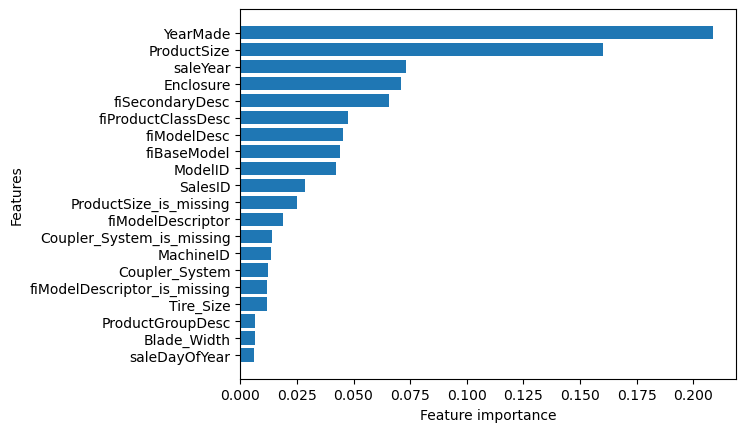

In [146]:
plot_features(X_train.columns, ideal_model.feature_importances_)

Those are the most important features.

YearMade is the most important feature.

Does this make sense, thats a question to the experts.

This is how you might need to collect data in the future to predict the sales price.

**Question: why might knowing the feature importances of a trained machine learning model be helpful**

**Final Challenge: What other ML could you use?** HINT: check out the regression seccion of scikit learns map. Try also CatBoost.ai or XGBoost.ai